# Corona in Deutschland und Rumänien - ein Vergleich

Die Grundlage der Folgenden Arbeit sollen die bisherigen Verläufe der Corona-Pandemie in Deutschland und Rumänien sein.
Somit beginnen wir damit, die Verläufe zuerst näher zu betrachten.

## Bisherige Verläufe der Pandemie

Zuerst betrachten wir die Fallzahlen sowohl in Rumänien, als auch in Deutschland.


(714,)


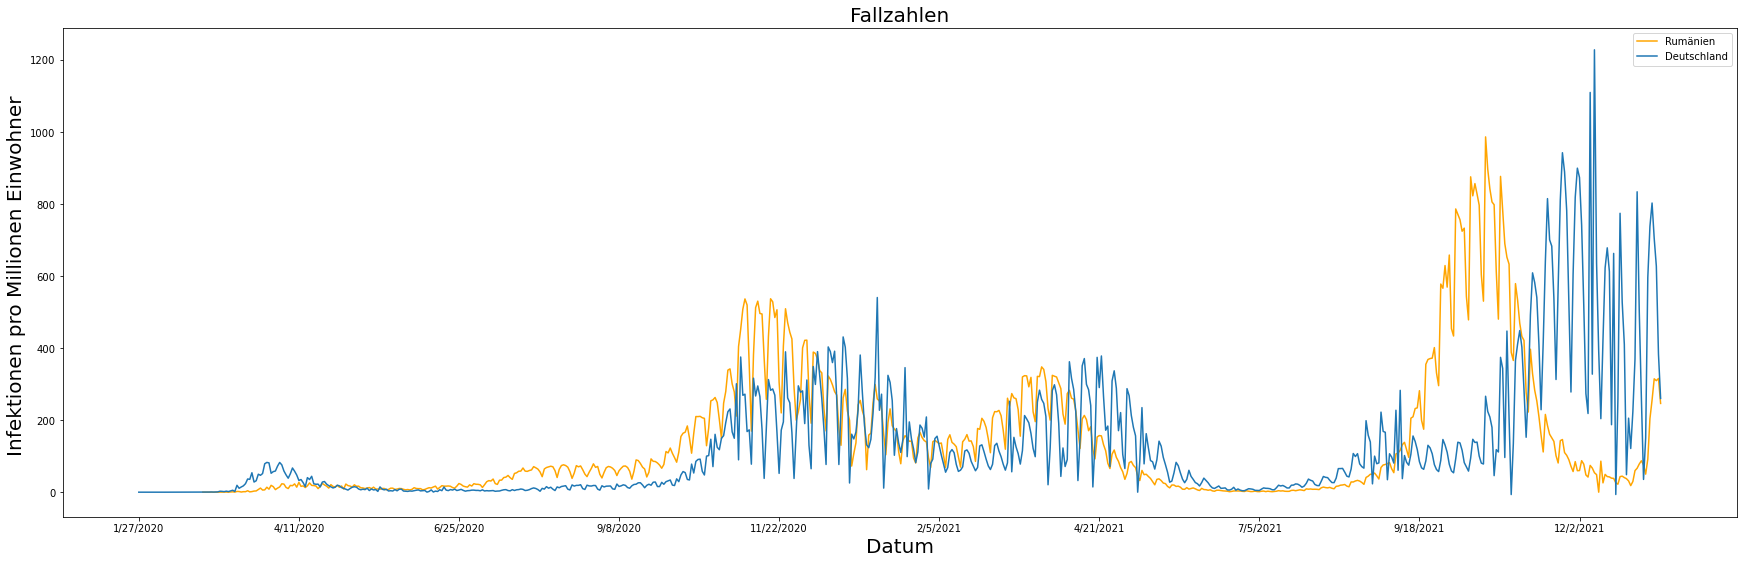

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import pandas as pd
import scipy.stats
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from scipy import stats
import csv
import seaborn as sns

df=pd.read_csv("owid-covid-data.csv")
labels_x=[]
labels_xloc=[]
labels_x1=[]
labels_xloc1=[]

loc=df.groupby("location")
date=loc.get_group("Germany")["date"]
l_date=date.to_numpy()
l_date1 = l_date
ro=loc.get_group("Romania")["new_cases_per_million"]
l_case_r=ro.to_numpy()
ger=loc.get_group("Germany")["new_cases_per_million"]
l_case_g=ger.to_numpy()
ro_ext =[]

for i in range(0, 30):
    ro_ext.append(None)

ro_n = ro_ext + ro.tolist()

for i in range(700):
    if(i%75==0):
        labels_x.append(l_date[i])
        labels_xloc.append(i)

plt.figure(figsize=(30,9))
plt.plot(l_date,ro_n, label = "Rumänien",color="orange")
plt.plot(l_date, l_case_g, label = "Deutschland")
plt.xticks(labels_xloc,labels_x)
plt.xlabel("Datum", fontsize="20")
plt.ylabel("Infektionen pro Millionen Einwohner ", fontsize="20")
plt.title("Fallzahlen", fontsize = "20")
plt.legend()
w

Der Verlauf der Infektionen pro Millionen Einwohner ist in Deutschland und Rumänien recht ähnlich, wobei die Zahlen in Rumänien meist etwas früher zu steigen beginnen, dafür aber auch früher wieder sinken. 

Als nächstes betrachten wir die Todesfälle in Verbindung mit dem Coronavirus in beiden Ländern

Text(0.5, 1.0, 'Todesfälle')

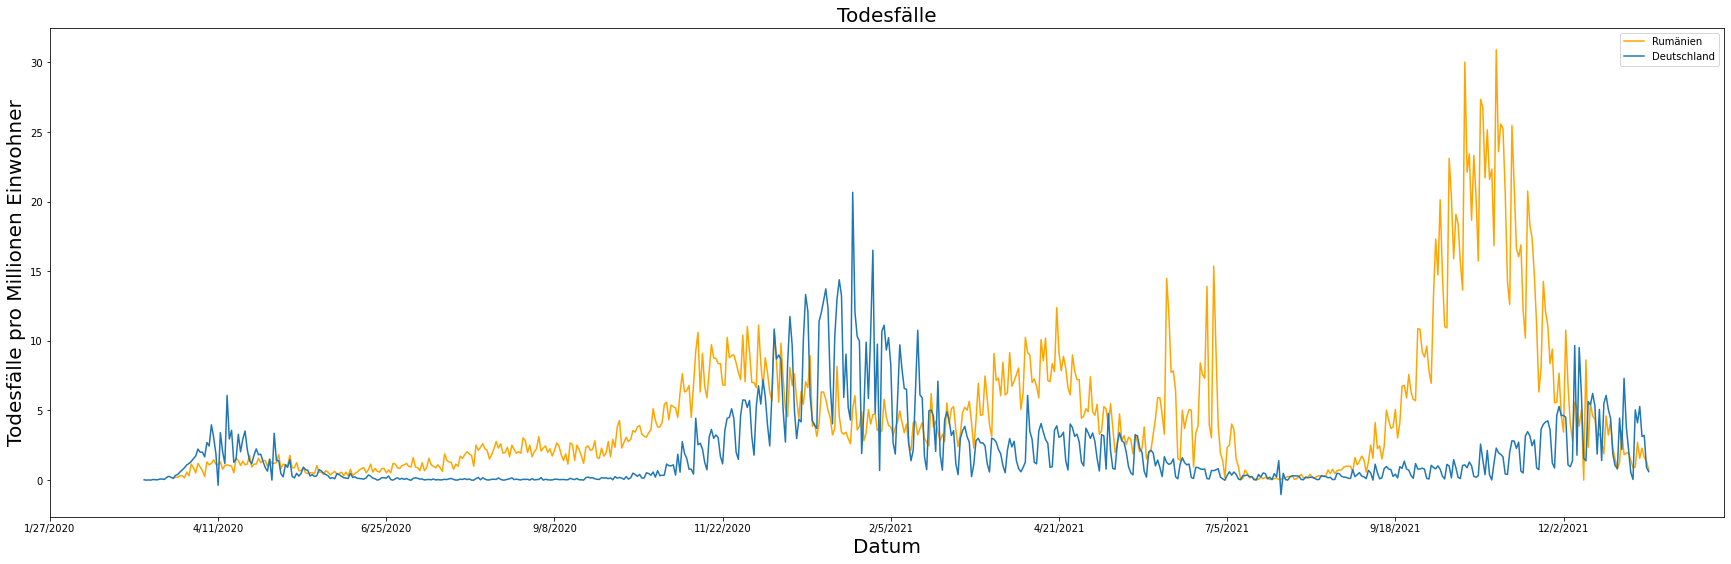

In [24]:
dedr=loc.get_group("Romania")["new_deaths_per_million"]
dedg=loc.get_group("Germany")["new_deaths_per_million"]

l_ded=dedr.to_numpy()
dedr_ext =[]

for i in range(0, 30):
    dedr_ext.append(None)

dedr_n = dedr_ext + l_ded.tolist()

plt.figure(figsize=(30,9))
plt.plot(l_date,dedr_n, label = "Rumänien",color="orange")
plt.plot(l_date,dedg, label = "Deutschland")
plt.xticks(labels_xloc,labels_x)
plt.xlabel("Datum", fontsize="20")
plt.ylabel("Todesfälle pro Millionen Einwohner", fontsize="20")
plt.legend()
plt.title("Todesfälle", fontsize="20")

Insgesamt sind die realtiven Todesfäller in Rumänien vorallem im Jahr 2021 deutlich höher, als in Deutschland.

Abschließend betrachten wir noch den Verlauf des Anteils der geimpften Bevölkerung sowohl in Rumänien, als auch in Deutschland.

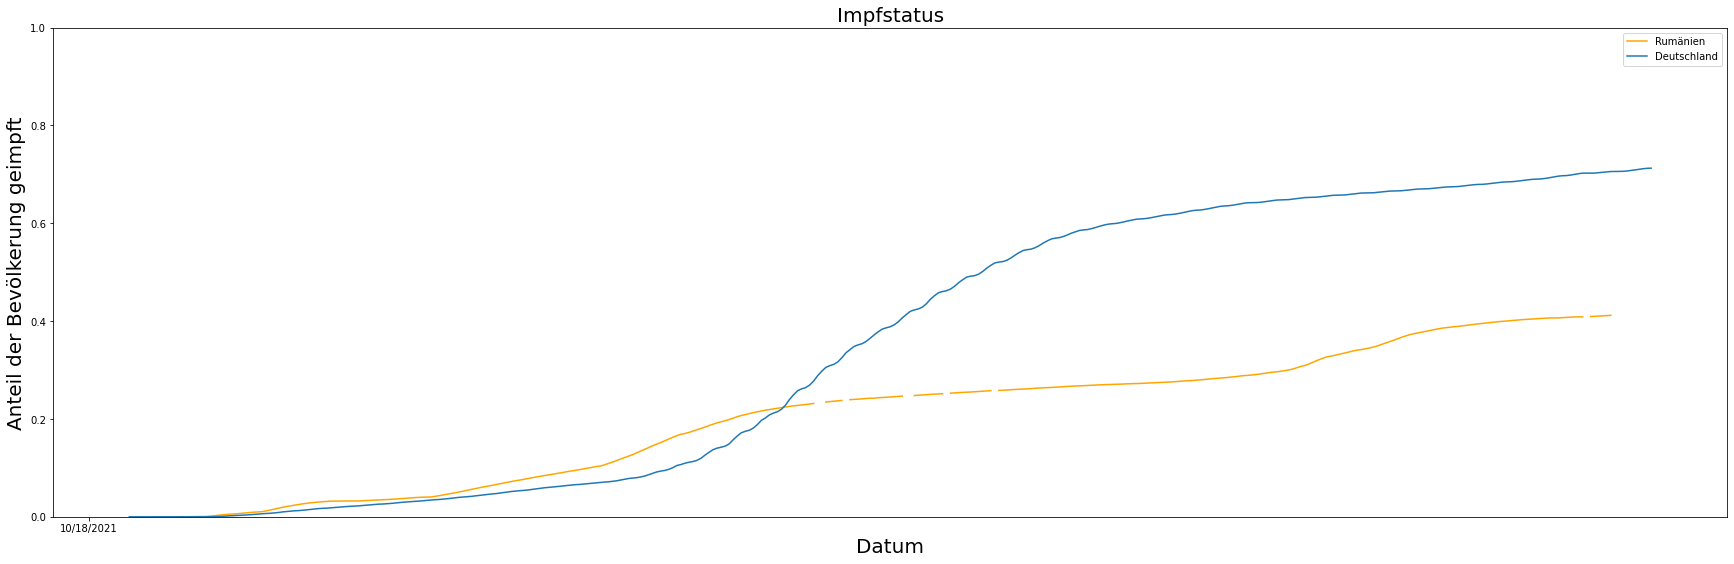

In [25]:
vacc_date=l_date[305:]
vacc_date[0]
for j in range(379):
    if(j%65==0):
        labels_x1.append(vacc_date[j])
        labels_xloc1.append(j)
vax_r=loc.get_group("Romania")["people_fully_vaccinated"]
r_vax=vax_r.to_numpy()
#r_vax = r_vax[~np.isnan(r_vax)]
vax_g = loc.get_group("Germany")["people_fully_vaccinated"]
g_vax=vax_g.to_numpy()
#g_vax = g_vax[~np.isnan(g_vax)]

vax_r = []
vax_g = []

for i in range(0, 21):
    vax_r.append(None)

for item in r_vax:
    vax_r.append(item/19127772)

for item in g_vax:
    vax_g.append(item/83900471)

plt.figure(figsize=(30,9))
plt.xticks(labels_xloc1,labels_x1)
plt.ylim([0,1])
plt.xlabel("Datum", fontsize="20")
plt.ylabel("Anteil der Bevölkerung geimpft", fontsize="20")
plt.plot(vax_r, label= "Rumänien",color="orange") 
plt.plot(vax_g, label = "Deutschland")
plt.title("Impfstatus", fontsize ="20")
plt.legend()

(Die Lücken im Graph für Rumänien resultieren aus fehlenden Werten im Datensatz, es ist davon auszugehen, dass diese annähernd linear geschlossen werden könnten) 

Der Anteil der vollständig Geimpften Personen ist in Deutschland deutlich höher als in Rumänien, wo nicht einmal 50% der Bevölkerung vollständig geimpft sind.

## Wirksamkeit von Coronatest *(Efficiency of Corona tests)*
Im Folgenden möchten wir untersuchen, ob Coronatest einen signifikanten Faktor bei der Prävention von schweren Verläufen darstellen.

*(Now we want to analyse how efficient tests can be as a prevantion method against hard Covid-19 infections.)*


---
Als Beobachtungszeitraum haben wir die Zeit vor dem generellen Impfstart gewählt, in dem Tests die primäre Schutzmaßnahme gegen Covid-19 waren. 

*(We've looked at the period of time preceding the mass manufacturing of the vaccine, when tests were the primarily indicator that a Covid medication was needed in order to avoid developing a harder form of the infection, in other words the only weapon that we had at the begginig of the pandemic)*

---


Text(0.5, 1.0, 'Tests Romania vs Germany')

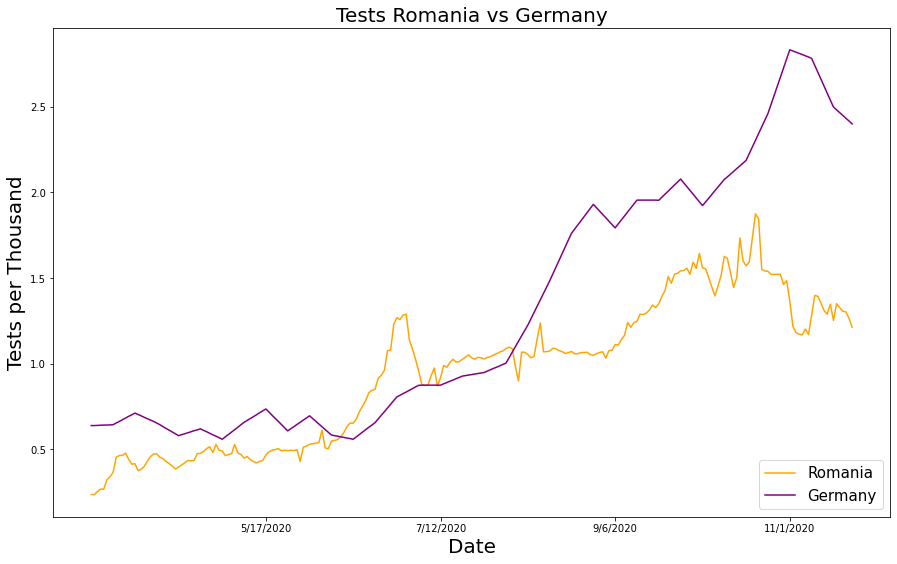

In [26]:
# Tests done in Ro/De before the mass distribution of the vaccine vaccine
labels_x2=[]
labels_xloc2=[] #arrays for the plotting of date as ticks

test=df.loc[df["location"]=="Romania"]["new_tests_smoothed_per_thousand"]
l_test=test.to_numpy() #array for the number of tests before the vaccine in Ro
l_test_new=l_test
l_test=l_test[55:300]
test_date=l_date[55:300]
for j in range(55,270):
    if(j%56==0):
        labels_x2.append(test_date[j])
        labels_xloc2.append(j)
        
plt.figure(figsize=(15,9)) #plot for Ro
plt.plot(l_test,"orange")
plt.xticks(labels_xloc2,labels_x2)
plt.xlabel("Date", fontsize="20")
plt.ylabel("Tests per Thousand", fontsize="20")   


test2=df.loc[df["location"]=="Germany"]["new_tests_smoothed_per_thousand"]
l_test2=test2.to_numpy() #array for the number of tests before the vaccine in De
l_test_new2=l_test2
l_test2=l_test2[55:300]
plt.plot(l_test2,"purple") #plot for De
plt.legend(["Romania", "Germany"], loc ="lower right",fontsize=15)
plt.title("Tests Romania vs Germany", fontsize=20)

Text(0.5, 1.0, 'Hospitalization Romania vs Germany')

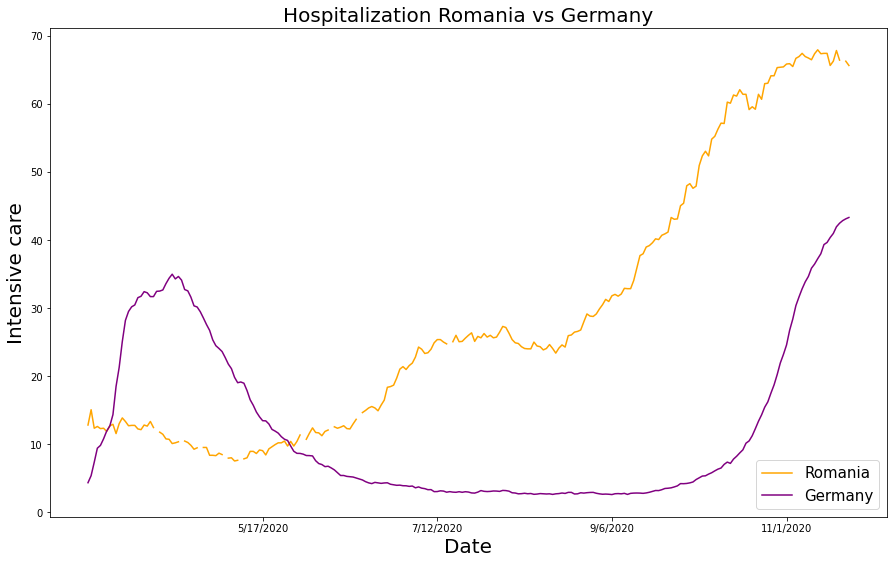

In [27]:
# Hospitalization Rates in Romania and Germany before the mass distribution of vaccines
hosp=df.loc[df["location"]=="Romania"]["icu_patients_per_million"]
l_hosp=hosp.to_numpy()  # array for the number of people in intensive care before the vaccine in Ro
l_hosp_vax=l_hosp[350:600]
l_test_vax=l_test_new[350:600]
l_hosp=l_hosp[55:300]

plt.figure(figsize=(15,9))
plt.plot(l_hosp,"orange")
plt.xticks(labels_xloc2,labels_x2)
plt.xlabel("Date", fontsize="20")
plt.ylabel("Intensive care", fontsize="20")   

hosp2=df.loc[df["location"]=="Germany"]["icu_patients_per_million"]
l_hosp2=hosp2.to_numpy() # array for the number of people in intensive care before the vaccine in De
l_hosp_vax2=l_hosp2[350:600]
l_test_vax2=l_test_new2[350:600]
l_hosp2=l_hosp2[55:300]
plt.plot(l_hosp2,"purple")
plt.legend(["Romania", "Germany"], loc ="lower right",fontsize=15)
plt.title("Hospitalization Romania vs Germany", fontsize=20)

---
Es liegt eindeutig eine Korrelation zwischen der Zahl der Tests und der Hospitalisierungsrate vor. Mehr Tests führten zu einer geringeren Anzahl an Patienten auf Intensivstationen.
Im Folgenden möchten wir diese Behauptung testen. 

*(We can clearly see that there is a lot of correlation between between the number of tests done and the hospitalization rate. More test done had the effect of reducing the intensive care patients. We would like to test this assumption)*

---

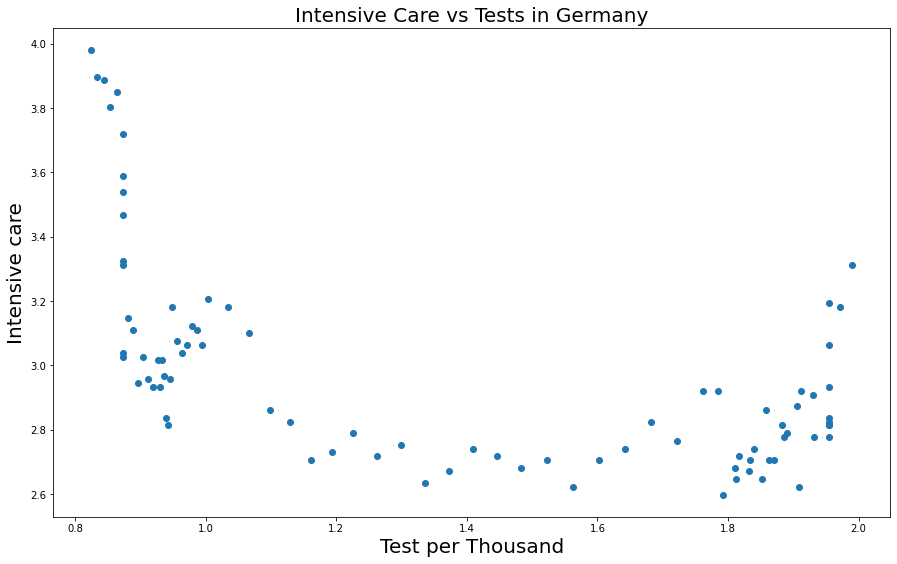

In [37]:
# Scatter plot for the situation in Germany Tests vs Intensive Care
plt.figure(figsize=(15,9))
plt.scatter(l_test2[100:185],l_hosp2[100:185])
plt.xlabel("Test per Thousand", fontsize="20")
plt.ylabel("Intensive care", fontsize="20")  


# print(scipy.stats.pearsonr(l_test2[100:180],l_hosp2[100:180])[0])
corr=scipy.stats.pearsonr(l_test2[100:185],l_hosp2[100:185])[0]
s1=l_test2[100:185]
s2=l_hosp2[100:185]
nr=len(test2[100:185])
r = np.corrcoef(l_test2[100:185], l_hosp2[100:185] )
plt.title("Intensive Care vs Tests in Germany", fontsize=20)
plt.show()



<AxesSubplot:xlabel='s1', ylabel='s2'>

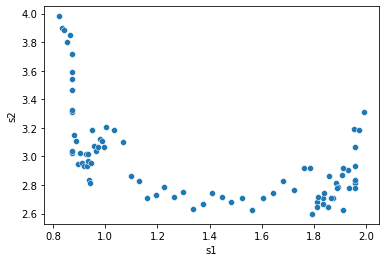

In [38]:
dataset = pd.DataFrame({'s1': s1, 's2': list(s2)}, columns=['s1', 's2'])
dataset
sns.scatterplot(data=dataset,x='s1',y='s2')



## Statistical testing

Wir stellen die Behauptung auf, dass eine Korrelation zwischen der Anzahl der Tests und der Anzahl in Personen auf Intensivstationen besteht.
Wir wollen die Behauptung mithilfe der Nullhypothese, dass keine Korrelation besteht überprüfen, die wir zu widerlegen versuchen.
Dafür nutzen wir Bootstapping und Permutation testing.

 *(We make the assumption that there is correlation between the number of tests taken and the number of the people in intensive care.
 We want to conduct this test around the Null Hypothesis that there is no correlation and than to reject it. In order to do so, we use Bootstapping and Permutation testing)*



#### We specify the null and alternative hypothesis

$$
H_0: \rho = 0
$$

$$
H_A: \rho \neq 0
$$

In [39]:
# Bootstaping
resample_corrs = []

for _ in tqdm(range(10000)):
    # We perform a permutaion test, so we shuffle the inputs arrays
    resample1 = np.random.choice(s1, size=nr, replace=True)
    resample2=  np.random.choice(s2, size=nr, replace=True)
    # With scipy we compute the correlation
    resample_corr = scipy.stats.pearsonr(resample1,resample2)[0]
    
    # we pack all the correlations after the shuffling into the resample_corr
    resample_corrs.append(resample_corr)

100%|██████████| 10000/10000 [00:01<00:00, 8785.22it/s]


Text(0.5, 1.0, 'Correlation Histogram')

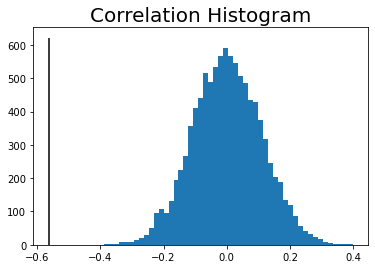

In [40]:
#Plotting the histogram
fig, ax = plt.subplots()
ax.hist(resample_corrs, bins=50);
ylim = ax.get_ylim()
ax.vlines(corr, *ylim, color='k')
plt.title("Correlation Histogram", fontsize=20)

Dieses Ergebnis ist eindeutig genug, um die Nullhypothese zu verwerfen.

In [41]:
# Linear regression for the same trend in Romania
model = LinearRegression()
inp=l_hosp[200:245]
inp=inp[~np.isnan(inp)]
targ=(l_test[200:245])
targ=np.delete(targ,42)
inp=np.delete(inp,42)
model.fit(inp[0:42].reshape(-1,1), targ[0:42])
predictions1 = model.coef_*inp[0:42] + model.intercept_

Text(0.5, 1.0, 'Linear Regression Romania')

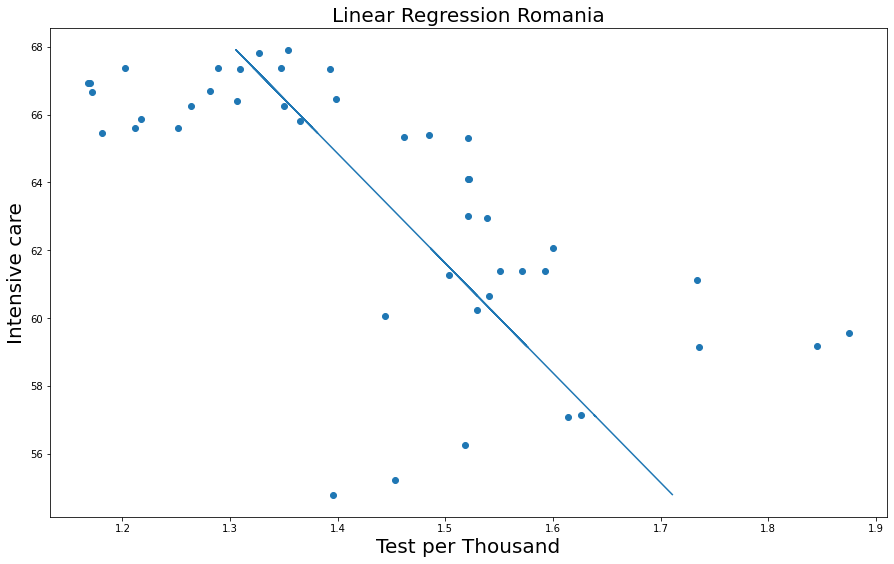

In [42]:
#Plot the scatter with the linear regression
plt.figure(figsize=(15,9))
plt.scatter(l_test[200:300],l_hosp[200:300])
plt.plot(predictions1,inp[0:42])
plt.xlabel("Test per Thousand", fontsize="20")
plt.ylabel("Intensive care", fontsize="20")  
plt.title("Linear Regression Romania", fontsize=20)

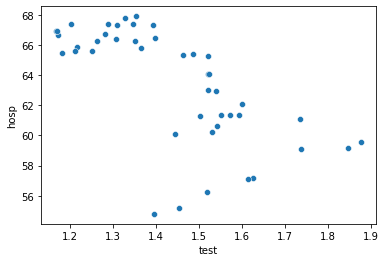

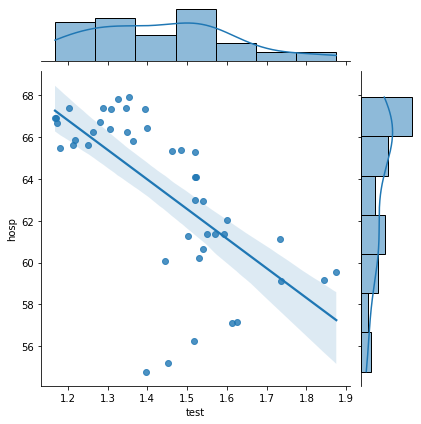

In [52]:
p1=l_test[200:300]
p2=l_hosp[200:300]
dataset1 = pd.DataFrame({'test': p1, 'hosp': p2}, columns=['test', 'hosp'])
sns.scatterplot(data=dataset1,x='test', y="hosp")
sns.jointplot(data=dataset1,x='test', y="hosp",kind="reg")

Der selbe Trend, den wir zuvor in Deustchland getestet haben ist hier nun auch in Rumänien wiederzuerkennen.
*(Here we can recognise the same trend that we've tested previously in Germany, now done in Romania.)*

---

Wir kommen damit aslo zum Ergebnis, dass Coronatest tatsächlich ein gutes Mittel zur Bekämpfung des Coronavirus, konkret zur Senkung der Zahl der schweren Verläufe ist. 

*(Now we can conclude that testing was/is a very good weapon against Covid-19, resulting in lower intensive cases)*

Text(0.5, 1.0, 'Hospitalization Romania vs Germany after vaccine')

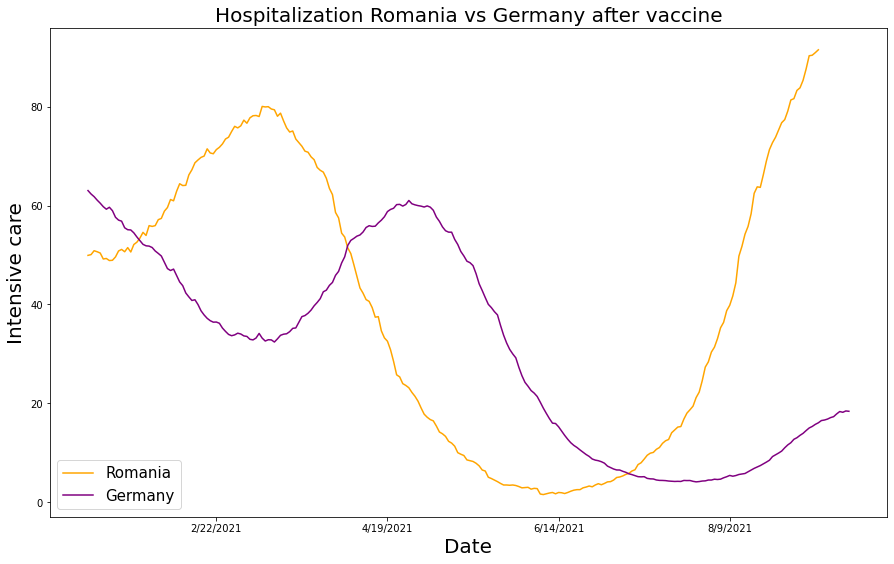

In [35]:
# Hospitalization rates after the mass-manufacturing of the Covid-19
labels_x3=[]
labels_xloc3=[]
for j in range(350,600):
    if(j%56==0):
        labels_x3.append(l_date1[j])
        labels_xloc3.append(j-350)
l_hosp_vax=l_hosp_vax[~np.isnan(l_hosp_vax)]

plt.figure(figsize=(15,9))
plt.plot(l_hosp_vax, "orange")
plt.plot(l_hosp_vax2,"purple")
plt.xticks(labels_xloc3,labels_x3)
plt.legend(["Romania", "Germany"], loc ="lower left",fontsize=15)
plt.xlabel("Date", fontsize="20")
plt.ylabel("Intensive care", fontsize="20")  
plt.title("Hospitalization Romania vs Germany after vaccine", fontsize=20)

Text(0.5, 1.0, 'Tests Romania vs Germany after vaccine')

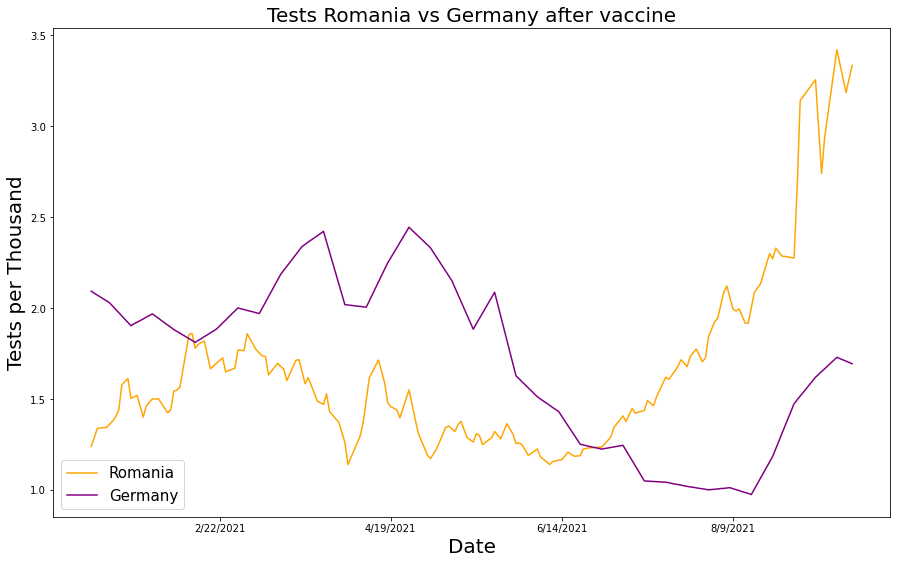

In [36]:
plt.figure(figsize=(15,9))
plt.plot(l_test_vax,"orange")
plt.plot(l_test_vax2,"purple")
plt.xticks(labels_xloc3,labels_x3)
plt.legend(["Romania", "Germany"], loc ="lower left",fontsize=15)
plt.xlabel("Date", fontsize="20")
plt.ylabel("Tests per Thousand", fontsize="20") 
plt.title("Tests Romania vs Germany after vaccine", fontsize=20)

Im der zweiten Jahreshäfte von 2021 ist unsere Hypothese der relativ inversen Proportionalität von Tests und Anzahl an Patienten in intensiver Behandlung nicht mehr eindeutig zutreffend. Dies liegt an einem dritten Faktor, welcher zum tragen kommt: Die Impfraten in beiden Ländern.

*(For the second part of the year 2021, our assumption of relative inverse proportionality between tests and number of intensive cases doesn't hold so exact anymore, because a third factor also comes in discussion: vaccination rates in both countries)*

---

Die positiven Effekte von Impfungen als Schutzmaßnahme sind klar und die Einflüsse der Impfung auf andere Parameter (Todesfälle, Intensiv Patienten, etc.) werden hiernicht weiter behandelt.
Im Folgenden mächten wir uns aber mit der Wirksamkeit der zugelassenen Impfstoffe befassen.

*(The beneficial effects of vaccination as a protection method are clear and the way that they influence other parameter (death numbers, intensive care etc.) won't be discussed here, but we are very much interested to study the efficancy of all the approved vaccines)*

# Wirksamkeit von Impfstoffen

**Im Folgenden geht es um die Wirksamkeit von Impfstoffen gegen das Coronavirus SARS-CoV-2.**

## Definition und Festellung der Wirksamkeit

Die Wirksamkeit eines Impfstoffes wird in Prozent angegeben und beschreibt die Anzahl von Infektionen von geimpften Personen relativ zu denen ungeimpfter bezüglich gleichgroßer Vergleichgruppen.
Bevor ein Impfstoff zugelassen wird, muss er klinisch geprüft werden. Dabei wird auch die Wirksamkeit des Impftoffes ermittelt.
Die vier, in Deutschland zugelassenen Impfstoffe gegen das Coronavirus SARS-CoV-2 erreichten in ihren Zulassungsstudien Wirksamkeiten von:
- Cormirnaty von BioNTech/Pfizer: bis zu 95%
- Spikevax(Vaccine Moderna) von Moderna: bis zu 95%
- Vaxzevria von AstraZeneca: bis zu 80%
- Janssen von Johnson & Johnson: bis zu 65%

## Leitfrage

**Sind die Wirksamkeiten der Impfstoffe, die in den Zulassungsstudien ermittelt wurden auf die Wirksamkeit einer Impfung für eine durchschittliche Person in Deustchland übertragbar?**

## Vereinfachung der Betrachtung der Impfstoffe

Für eine einzelne Betrachtung der tatsächlichen Wirksamkeit eines Impfstoffes in der deutschen Lebensrealität werden die Infektionszahlen der, mit diesem Impfstoff geimpften Personen benötigt. Da jedoch keine ausreichenden Daten zu Fallzahlen von geimpften, aufgeschlüsselt nach Impfstoffen vorliegen, betrachten wir die 4 Impfstoffe gemeinsam als "allgemeiner Impfstoff".

Die Wirksamkeit des "allgemeinen Impfstoffes" definieren wir als Mittel der, nach Anteil der verabreichten Dosen gewichteten Wirksamkeiten der 4 Impfstoffe.

Da uns keine konkreten Daten zu den Anteilen der einzelnen Impfstoffe an allen verimpften Dosen vorliegen, setzen wir diese in unserem Model gleich mit den Anteilen an allen, an Deutschland gelieferten Dosen.

Insgesamt wurden bis zum 30.1.2022 187,6 Mio Dosen Impfstoff an Deustchland geliefert. Davon 134,1 Mio Dosen von BioNTech/Pfizer, 33,6 Mio Dosen von Moderna, 14,4 Mio Dosen von Astrazeneca und 5,4 Mio Dosen von Johnson & Johnson.

Daraus ergibt sich für die  Wirksamkeit des "allgemeinen Impfstoffes":

$$ \frac {(0,95 * 134,1 + 0,95 * 33,6 + 0,80 * 14,4 + 0,60 * 5,4)}{187,6} = 0,9279 $$

Das heißt, die Wirksamkeit einer Impfung in Deutschland ist den Zulassungstudien zu Folge im Durchschnitt bei bis zu 93%.

## Forschungsfrage

Um die Leitfrage beantworten zu können, müssen wir sie konkretisieren.

Unser "allgemeine Impfstoff" hat eine Wirksamkeit(Studie) von bis zu 93%.
Wir definieren diese Wirksamkeit an einem bestimmten Zeitpunkt als, auf die deustche Lebensrealität übertragbar, wenn die reale Wirksamkeit zu diesem Zeitpunkt zwischen 85% und 93% liegt.
Eine höhere Wirksamkeit als 93%, ist nicht zu erwarten.

Im Folgenden wir untersucht, ob die reale Wikrsamkeit des "allgemeinen Impfstoffes" zwischen 85% und 93% liegt.

## Inzidenzen

Um die reale Wirksamkiet ermitteln zu können, ziehen wir die **Inzidenzen (Fallzahlen pro 100'000 Personen in den letzten 7 Tagen) getrennt nach Impfstatus** heran.
Hierbei betrachten wir die Gruppen der **Ungeimpften**, die der **vollständig geimpften** (je nach Impfstoff 1 oder 2 mal) und die der **maximal Geimpften** (vollständig geimpft + Auffrischimpfung)
Wir betrachten die Inzidenzen im Zeitraum ab der **28. Kalenderwoche 2021 bis zur 1. Kalenderwoche 2022**. 

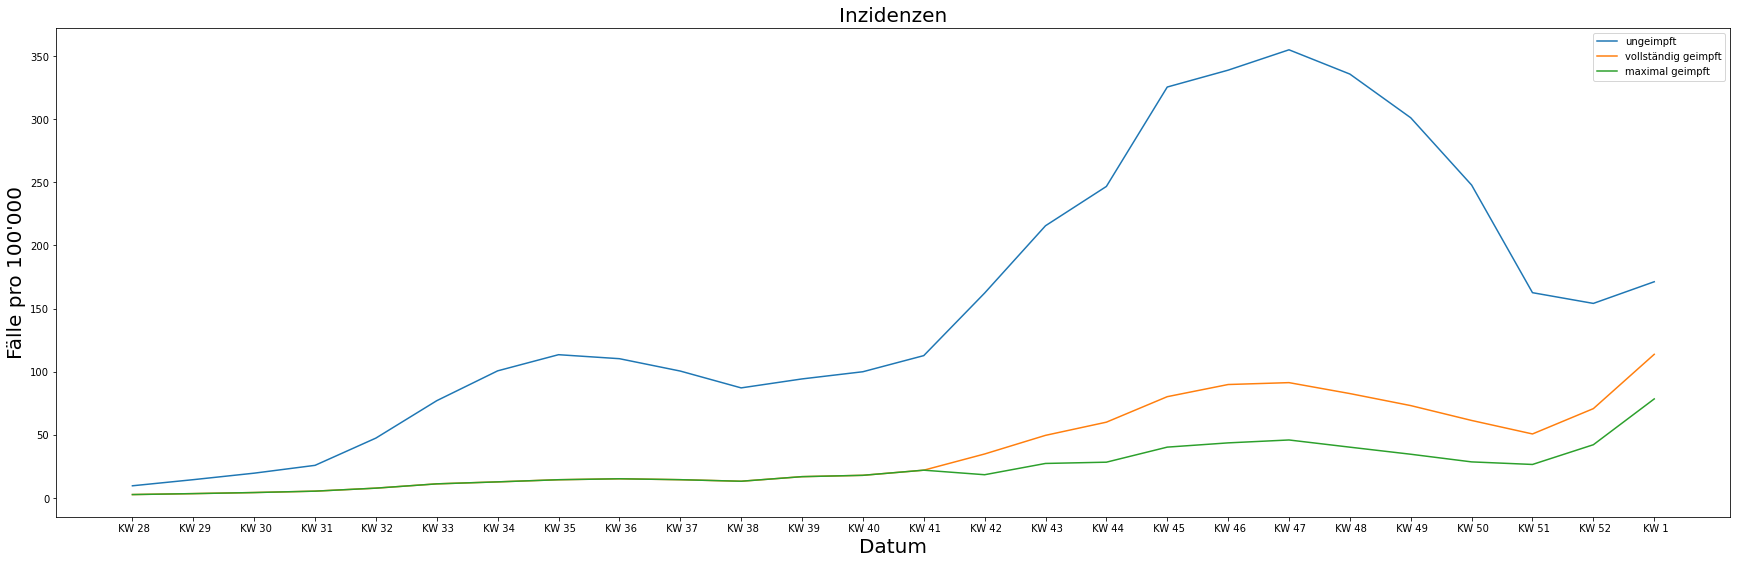

In [13]:
import matplotlib.axes as axs


f = open('Inzidenz_nach_Impfstatus.csv', newline='')
inzid_csv = csv.DictReader(f, delimiter=',')

Date = []
inzid_un = []
inzid_full = []
inzid_max = []

for item in inzid_csv:
    Date.append(" KW " + item['Meldewoche'])
    if item['Ungeimpfte 12-17 Jahre'] == '--':
            inzid_un.append((float(item['Ungeimpfte 18-59 Jahre'].replace(',','.'))+float(item['Ungeimpfte 60+ Jahre'].replace(',','.')))/2)
            inzid_full.append((float(item['Grundimmunisierte  18-59 Jahre'].replace(',','.'))+float(item['Grundimmunisierte 60+ Jahre'].replace(',','.')))/2)
            
            if item['Mit Auffrischimpfung 18-59 Jahre'] == '--':
                inzid_max.append((float(item['Grundimmunisierte  18-59 Jahre'].replace(',','.'))+float(item['Grundimmunisierte 60+ Jahre'].replace(',','.')))/2)
            else:
                inzid_max.append((float(item['Grundimmunisierte  12-17 Jahre'].replace(',','.'))+float(item['Mit Auffrischimpfung 18-59 Jahre'].replace(',','.'))+float(item['Mit Auffrischimpfung 60+ Jahre'].replace(',','.')))/3)


    elif item['Mit Auffrischimpfung 18-59 Jahre'] == '--':
            inzid_max.append((float(item['Grundimmunisierte  12-17 Jahre'].replace(',','.'))+float(item['Grundimmunisierte  18-59 Jahre'].replace(',','.'))+float(item['Grundimmunisierte 60+ Jahre'].replace(',','.')))/3)
            inzid_un.append((float(item['Ungeimpfte 12-17 Jahre'].replace(',','.'))+float(item['Ungeimpfte 18-59 Jahre'].replace(',','.'))+float(item['Ungeimpfte 60+ Jahre'].replace(',','.')))/3)
            inzid_full.append((float(item['Grundimmunisierte  12-17 Jahre'].replace(',','.'))+float(item['Grundimmunisierte  18-59 Jahre'].replace(',','.'))+float(item['Grundimmunisierte 60+ Jahre'].replace(',','.')))/3)

            
    else:
        inzid_un.append((float(item['Ungeimpfte 12-17 Jahre'].replace(',','.'))+float(item['Ungeimpfte 18-59 Jahre'].replace(',','.'))+float(item['Ungeimpfte 60+ Jahre'].replace(',','.')))/3)
        inzid_full.append((float(item['Grundimmunisierte  12-17 Jahre'].replace(',','.'))+float(item['Grundimmunisierte  18-59 Jahre'].replace(',','.'))+float(item['Grundimmunisierte 60+ Jahre'].replace(',','.')))/3)
        inzid_max.append((float(item['Grundimmunisierte  12-17 Jahre'].replace(',','.'))+float(item['Mit Auffrischimpfung 18-59 Jahre'].replace(',','.'))+float(item['Mit Auffrischimpfung 60+ Jahre'].replace(',','.')))/3)
        
plt.figure(figsize=(30,9))
plt.plot(Date,inzid_un, label = "ungeimpft")
plt.plot(Date, inzid_full, label = "vollständig geimpft")
plt.plot(Date, inzid_max, label = "maximal geimpft")
#plt.xticks(labels_xloc,labels_x)
plt.xlabel("Datum", fontsize="20")
plt.ylabel("Fälle pro 100'000", fontsize="20")
plt.title("Inzidenzen", fontsize = 20)
plt.legend()
plt.show()

Eine erste Betrachtung liefert die Erkenntnis, dass der "allgemeine Impfstoff" eine offensichtliche Wirksamkeit hat. Diese ist jedoch rein optisch schwer einzuschätzen.
Um dies zu erleichtern, fügen wir dem Diagramm die theoretischen Inzidenzen für Geimpfte hinzu, die bei einer Wirksamkeit von 85% bzw. 93%, basierend auf den tatsächlichen Fallzahlen der Ungeimpften vorliegen würden.

Diese ergeben sich aus der Formel für die Wirksamkeit $W$, wobei $I_u(t)$ die Inzidenz der Ungeimpften und $I_g(t)$ die, der Geimpften, jeweisl zum Zeitpunkt t beschreibt:

$$ W = 1 - \frac{I_g(t)}{I_u(t)}  \Rightarrow  I_g(t) = I_u(t) * (1-W) $$

Diese lassen einen deutlich offensichtlicheren Vergleich zu.

Text(0.5, 1.0, 'Inzidenzen bei x% Wirksamkeit vs. Realität')

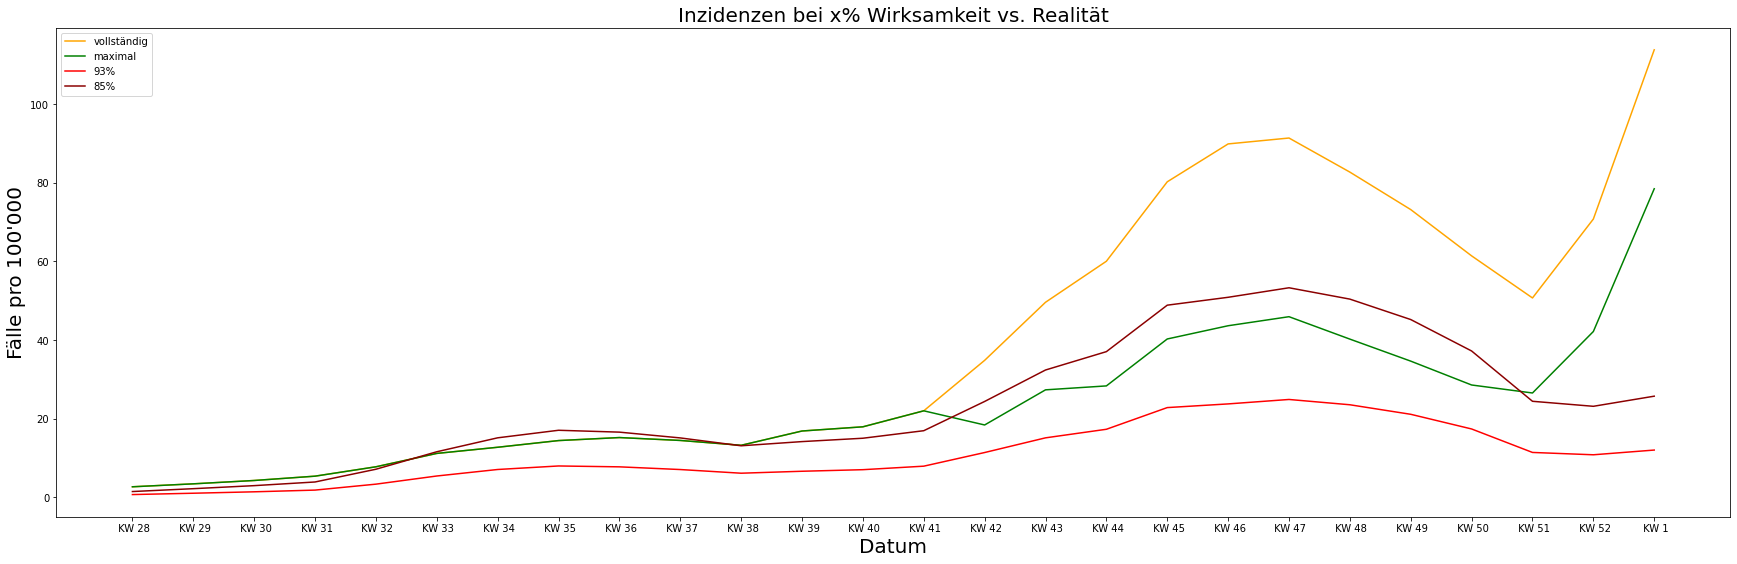

In [14]:
inzid_93 = []
inzid_85 = []

for item in inzid_un:
    inzid_93.append(item*(1-0.93))
    inzid_85.append(item*(1-0.85))

plt.figure(figsize=(30,9))
plt.plot(Date, inzid_full, 'orange', label = "vollständig")
plt.plot(Date, inzid_max, 'green', label = "maximal")
plt.plot(Date, inzid_93, 'red', label = "93%")
plt.plot(Date, inzid_85, 'darkred', label = "85%")
plt.xlabel("Datum", fontsize="20")
plt.ylabel("Fälle pro 100'000", fontsize="20")
plt.legend()
plt.title("Inzidenzen bei x% Wirksamkeit vs. Realität", fontsize = 20)


Es ist zu erkennen, dass sich die Inzidenzen der maximale Geimpften tatsächlich über einen Großteil des betrachteten Zeitraums mindest in der Nähe der 85% Linie liegt.
Ab dem Start der Auffrischimpfungen (Ab der Trennung von vollständig geimpft/maximal geimpft, KW 41) steigen die Inzidenzen der vollständig Geimpften deutlich stärker. 
Außerdem ist zu erkennen, dass ab KW 51 die Inzidenzen, sowohl der vollständig, als auch der maximal geimpften zunehmend von den theoretsichen abweichen. 

Im Folgenden wollen wir die tatsächlichen Abweichungen der Inzidenzen der maximal Geimpften von den theoretischen Inzidnzen bei einer Wirksamkiet von 85% näher betrachten. 
Dafür plotten wir den Faktor, um welchen sich die tatsächlichen Inzidenzen von den theorretischen untescheiden.

Text(0.5, 1.0, 'Abweichung der Inzidenzen')

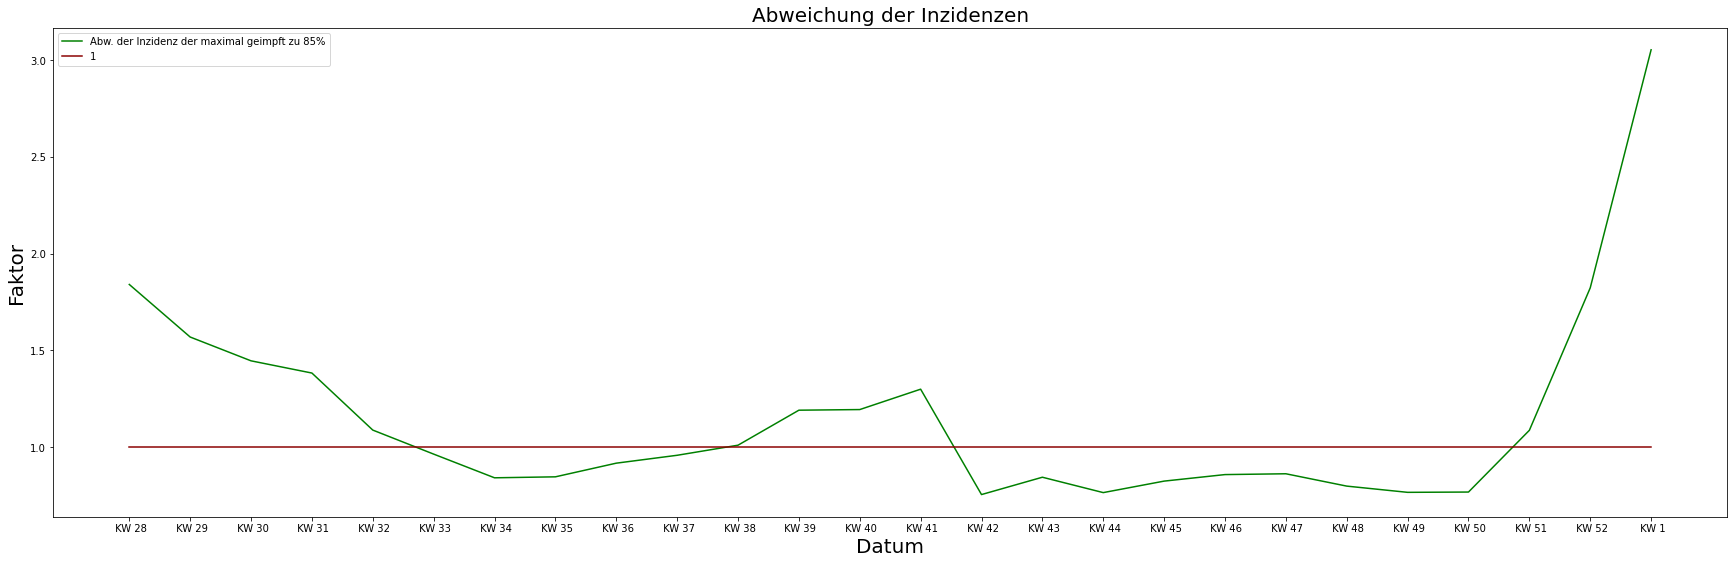

In [15]:
abw_85 = []
exmpl_1 = []

for i in range(0, len(inzid_max)):
    abw_85.append(inzid_max[i]/inzid_85[i])
    exmpl_1.append(1)
    
plt.figure(figsize=(30,9))
plt.plot(Date, abw_85, 'green', label = "Abw. der Inzidenz der maximal geimpft zu 85%")
plt.plot(Date, exmpl_1, 'darkred', label = "1")
plt.xlabel("Datum", fontsize="20")
plt.ylabel("Faktor", fontsize="20")
plt.legend()
plt.title("Abweichung der Inzidenzen", fontsize = 20)

Bis zu KW 52 ist die Abweichung stets bei einem Faktor kleiner zwei, in der Zeit von KW 32 bis KW 51 sogar grötenteils kleiner 1, heißt die tatsächliche Wirksamkiet ist in der Zeit größer als 85%. Um diese Beobachtungen zu konkretisieren, berechenen wir die mittleren Abweichungen des gesamten Zeitraums und bis zum Begin des finalen starken Anstiegs in KW 50. 

In [16]:
import statistics as stat

print(stat.mean(abw_85))
del abw_85[(len(abw_85)-3):]
print(stat.mean(abw_85))


1.1439408299733127
1.0339179073200628


Über den gesamten liegt die Abweichung also bei ca. 15%, vor dem abschließenden starken Anstieg ab KW 50 beigerade einmal knapp über 3%. Die tatsächliche Wirksamkeit der maximalen Impfung mit dem "allgemeinen Impfstoff" liegt also im Mittel über dem Beaobachtungszeitraum nicht allzuweit unter 85%. 

Um diese Wirksamkeit konkret zu bestimmen, nutzen wir wieder die Formel
$$ W = 1 - \frac{I_g(t)}{I_u(t)}$$
und plotten die somit bestimmten Wirksamkeiten der vollständigen und der maximalen Impfung mit dem "allgemeinen Impfstoff".
Außerdem berechnen wir die mittlere Wirksamkeit über den ganzen Beobachtungszeitraum, also auch exklusive des finalen anstieges ab KW 51.

0.5420397041650449
0.33573374854028815
0.8284088755040031
0.8449123139019905
0.7650419233516258
0.7967812467805492


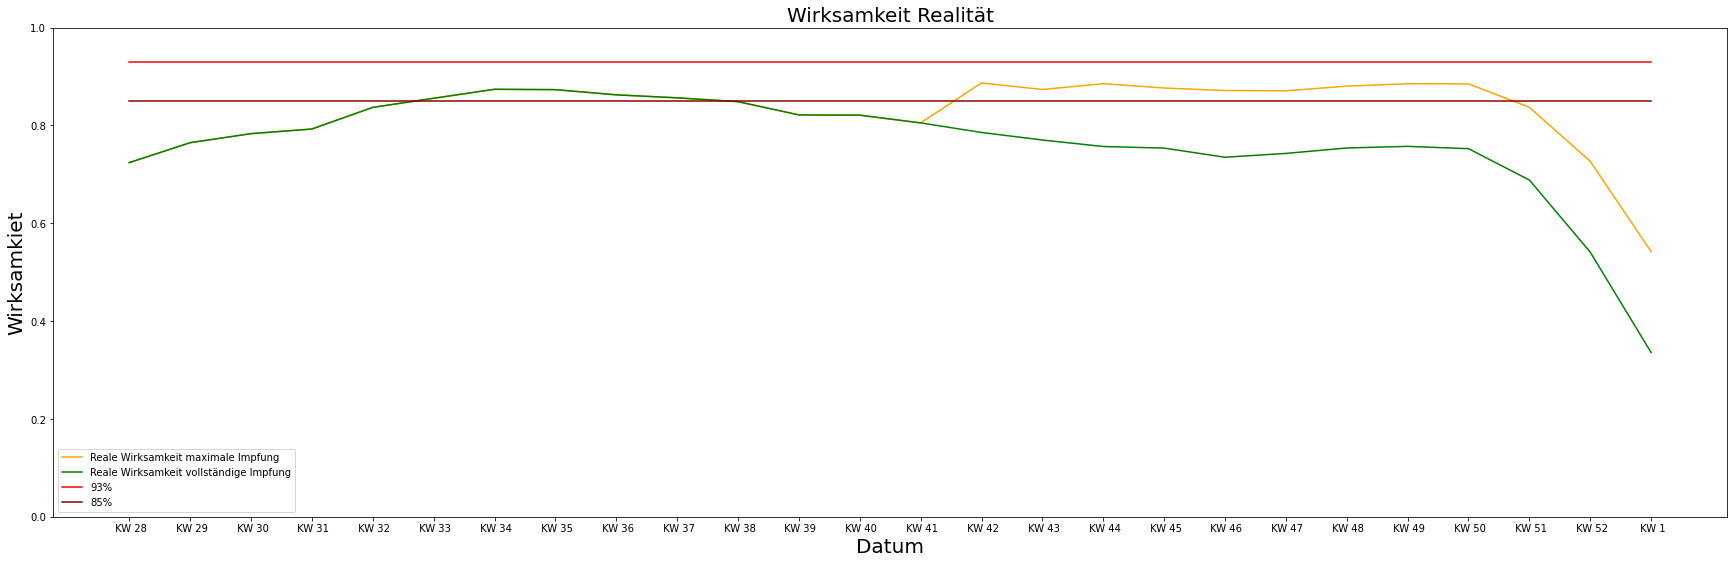

In [17]:
import statistics as stat

Eff_max = []
Eff_full = []
eg_93 = []
eg_85 = []

for i in range(0, len(inzid_un)):
    Eff_max.append(1-(inzid_max[i]/inzid_un[i]))
    Eff_full.append(1-(inzid_full[i]/inzid_un[i]))
    eg_93.append(0.93)
    eg_85.append(0.85)

plt.figure(figsize=(30,9))
plt.plot(Date, Eff_max, 'orange', label = "Reale Wirksamkeit maximale Impfung")
plt.plot(Date, Eff_full, 'green', label = "Reale Wirksamkeit vollständige Impfung")
plt.plot(Date, eg_93, 'red', label = "93%")
plt.plot(Date, eg_85, 'darkred', label = "85%")
plt.ylim([0, 1])
plt.xlabel("Datum", fontsize="20")
plt.ylabel("Wirksamkiet", fontsize="20")
plt.title("Wirksamkeit Realität", fontsize = 20)
plt.legend()

print(Eff_max[len(Eff_max)-1])
print(Eff_full[len(Eff_max)-1])


print(stat.mean(Eff_max))
del Eff_max[(len(Eff_max)-3):]
print(stat.mean(Eff_max))

print(stat.mean(Eff_full))
del Eff_full[(len(Eff_full)-3):]
print(stat.mean(Eff_full))

Die reale Wirksamkeit einer maximalen Impfung liegt im Mittel über den Beobachtungszeitraum bei ca. 82,8%. Die Wirksamkeit ist jedoch seit KW 50 stark eingebrochen auf 54,2%. 
Bei einer vollständigen Impfung liegt die reale Wirksamkeit im Mittel bei 76,5%, ist jedoch ebenfalls seit KW 50 stark gefallen, auf ca. 33,6%.

## Ergebnis

Wir kommen also zu dem Ergebnis, dass die Wirksamkeit einer maximalen Impfung im Mittel geringer ist, als 85%, allerdings in einigen Zeitintervallen über 85% liegt.
Im Mittel über den Beobachtungszeitraum ist die Wirksamkeit aus der Zulassungsstudie also nicht auf die deutsche Lebensrealität übertragbar, in über 50% des Beobachtungszeitraumes einzeln betrachtet aber schon.

Die Wirksamkeit einer vollständigen Impfung ist im Mittel und auch über einen Großteil des Beobachtungszeitraumes deutlich unter 85%, wodurch für die Wirksamkeit aus der Zulassungsstudie bei einer vollständigen Impfung nicht auf die deutsche Lebensrealität übertragbar ist.

## Modell- & Ergebniskritik

Die vorhergegangene Arbeit und vorallem das behandelte Modell hat einige größere Probleme:

- Die Verallgemeinerung der Impfstoffe führt dazu, dass die Übertragbarkeit dieser Arbeit auf reale Einzelpersonen nur sehr eingeschränkt ist, da die ursprünglich getesteten Wirksamkeiten der verschiedenen Impfstoffe sich teils stark unterscheiden. Genauere Ergebnisse benötigten eine Auseinandersetzung mit den Fallzahlen nach Impfstatus, nach Impfstoff getrennt betrachtet.
- Außerdem ist die Vergleichbarkeit von Studie und Realität durch Veränderung der Grundbedingungen mit der Zeit (3G, Lockdowns u.Ä) geschmälert. Beispielsweise der starke Rückgang der realen Wirksamkeit in unserem Modell ab KW 50 muss nicht tatsächlich bedeuten, dass die Schutzwirkung einer Impfung in dieser Zeit nachgelassen hat. Durch die von uns verwendetet Definition der Wirksamkeit führen auch bessere Schutzmaßnahmen für Ungeimpfte zu einem niedrigeren Wert der Wirksamkeit, da sich so weniger Ungeipfte infizieren. Der finale Anstieg der Fallzahlen geht zeitlich mit dem Begin der "Omikron-Welle" und der dazugehörigen Schutzmaßnahmen, vor allem die Einführung von großflächigen Testpflichten für Ungeimpfte (3G) bis hin zum teilweisen Ausschluss Ungeimpfter von Teilen des öffentlichen Lebens (2G/2G+) einher. Häufigere Testungen bei Ungeimpften führen zur früheren Feststellung von Infektionen, wodurch eine Weiterverbreitung des Virus verlangsamt werden kann. Da seit Begin der "Omikron-Welle" aufgrund der Maßnahmen die Vermutung nahe liegt, dass die Test-Quote bei Ungeimpften deutlich höher ist als die bei Geimpften, werden also relativ mehr Infektionen bei Ungeimpften frühzeitig erkannt. Durch die Exkludierung von Ungeimpften durch Maßnahmen wie 2G können sich Infektionen bei Geimpften so schneller verbreiten, als bei Ungeimpften, welche zu weniger Kontakten restriktiert sind.
Damit einhergehend ist der Umstand, dass Geimpfte Infizierte häufig eine geringere Viruslast aufweisen, was die Wirksamkeit von Schnelltests für sie verringert. Dies und die häufig leichteren Verläufe führen ebenfalls dazu, dass selbst Testpflichten für Geimpfte relativ ineffektiver sind, als für Ungeimpfte. 
Insgesamt ist die tatsächliche Wirksamkeit der Impfung nur dann sinnvoll bestimmbar, wenn beide Testgruppen (Geimpft/Ungeimpft) den gelichen Maßnahmen folgen.
- Ein weiteres Problem liegt bei der Betrachtung der vollständig Geimpften vor. Auch ab Begin der Auffrischimpfungen wird nicht differenziert betrachtet, ob Personen "frisch" vollständig geimpft sind, oder ob Personen bereits eine Auffrischimpfung benötigen, diese aber noch nicht bekommen haben. So überschneiden sich in diesen Zahlen die Einflüsse des zeitlichen Rückgangs der Schutzwirkung, als auch die Veränderung der Wirksamkeit durch Veränderung der Lebensrealität und Mutaion des Coronavirus selbst. Die Einflüsse dieser zwei Faktoren sind in unserem Modell nicht eindeutig trennbar.

## Fazit

Insgesamt lässt sich feststellen, dass die ursprüngliche, in Zulassungstudien bestimmte Wirksamkeit nicht genau auf das Verhältnis der Infektionen von Geimpften und Ungeimpten in der Realität übertragen lässt. Dies liegt unter anderem daran, dass Vorraussetzungen der Studie, nämlich geiche Möglichkeiten ud Maßnahmen für alle Teilnehmenden in Realität nicht gegeben ist. Folglich beschreibt die reale Wirksamkeit etwas anderes, als die der Zulassungsstudien, nämlich das Infektionsverhältnis unter verschiedenen Vorraussetzungen für Geimpfte und Ungeimpfte.
Es lässt sich jedoch feststellen, dass die Schutzwirkung von Impfungen gegen das Coronavirus eindeutig nachweisbar ist. Außerdem zeigt sich, dass der Anteil der Infizierten mit Auffrsichimpfung noch einmal deutlich geringer ist, als der der lediglich vollständig Geimpften.

## Quellen

- https://impfdashboard.de/  Stand 01.02.2022
- https://www.zusammengegencorona.de/impfen/impfstoffe/wirksamkeit-und-sicherheit/#id-7b2708bd-d11b-5d51-801e-defc5d81745a Stand 01.02.2022
- https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Daten/Inzidenz_Impfstatus.html Stand  26.01.2022
- https://github.com/owid/covid-19-data/tree/master/public/data Stand 10.01.2022
    